In [1]:
# Import py files for functions 
import wrangle 


# Import libraries to work with DataFrames and financial data
import pandas as pd
import pandas_ta as ta
import numpy as np

# Import libraries to visualiztion for data and financial data
import mplfinance as mpf
import matplotlib.pyplot as plt
import seaborn as sns

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.stattools import acf



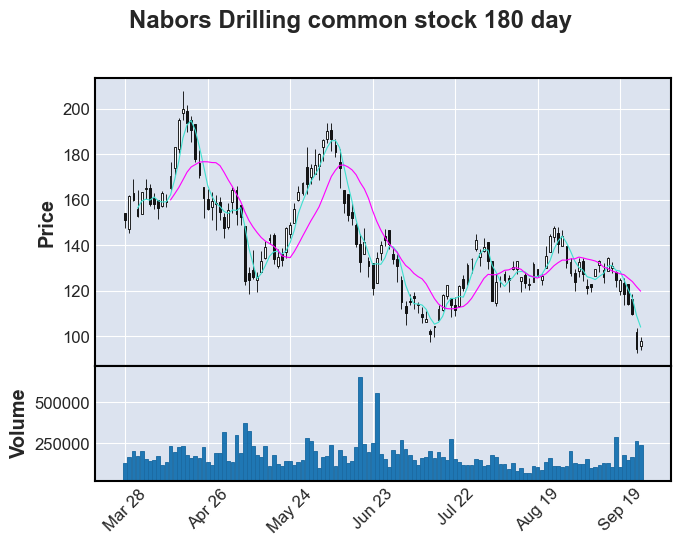

open              0
high              0
low               0
close             0
adj close         0
volume            0
rsi_14            0
ema_10            0
nbrs_adj_close    0
nbrs_volume       0
nbrs_rsi14        0
nbrs_ema_10       0
index_level       0
dtype: int64
open              float64
high              float64
low               float64
close             float64
adj close         float64
volume              int64
rsi_14            float64
ema_10            float64
nbrs_adj_close    float64
nbrs_volume         int64
nbrs_rsi14        float64
nbrs_ema_10       float64
index_level       float64
dtype: object
                count          mean           std          min           25%  \
open            112.0  2.910875e+01  4.626886e+00       21.380  2.511000e+01   
high            112.0  2.963616e+01  4.720257e+00       21.530  2.554750e+01   
low             112.0  2.844821e+01  4.521883e+00       20.420  2.461750e+01   
close           112.0  2.901348e+01  4.612084e+00      

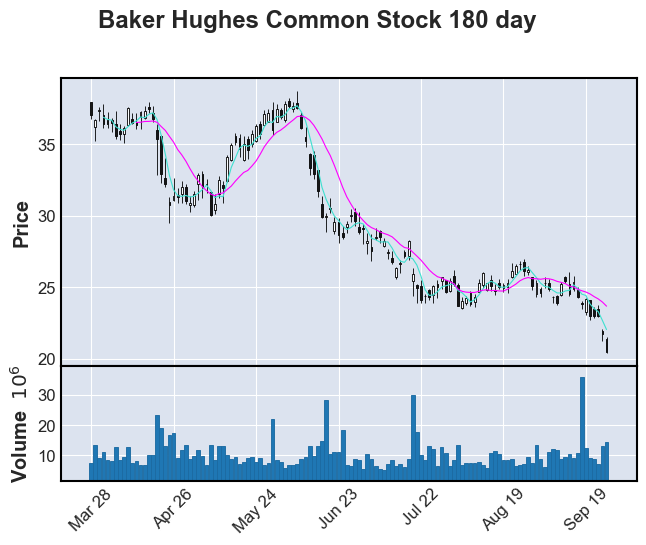

In [2]:
stocks_and_index=wrangle.wrangle_data()


# Initial visualizations

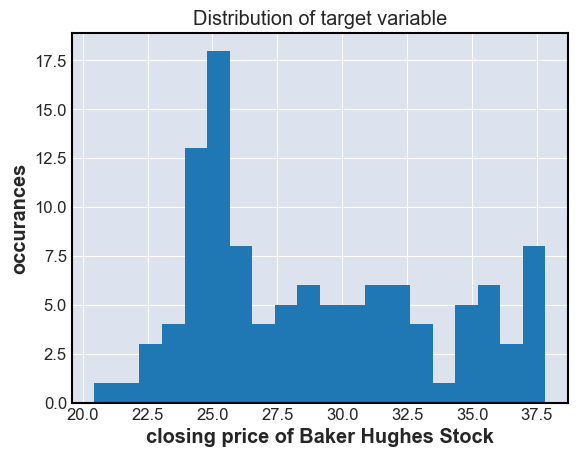

In [3]:

wrangle.tar_var_dist(stocks_and_index)

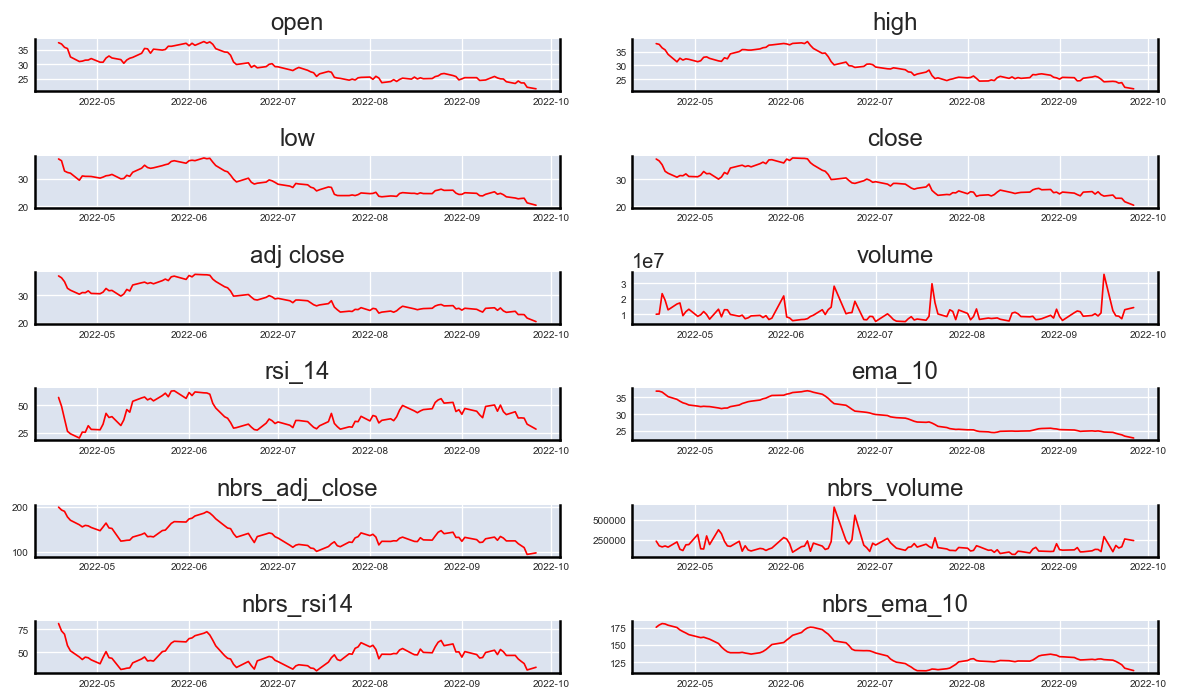

In [4]:


wrangle.display_historical_data(stocks_and_index)

# Granger's Causality Test
#### The Granger causality test is a statistical hypothesis test for determining whether one time series is useful in forecasting another

## H_0 - historical values in series (x) do not have a causal relationship (historical values in regression equation = 0) with values in series (y)

## H_A - we reject the null hypothesis

In [5]:
 
wrangle.grangers_causation_matrix(stocks_and_index, variables = stocks_and_index.columns)   

,open_x,high_x,low_x,close_x,adj close_x,volume_x,rsi_14_x,ema_10_x,nbrs_adj_close_x,nbrs_volume_x,nbrs_rsi14_x,nbrs_ema_10_x,index_level_x
open_y,1.0000,0.0000,0.0000,0.0000,0.0000,0.0999,0.0000,0.0000,0.0000,0.5674,0.0000,0.0000,0.0000
high_y,0.0127,1.0000,0.0001,0.0000,0.0000,0.3928,0.0000,0.0000,0.0043,0.2757,0.0024,0.0133,0.1589
low_y,0.0016,0.0015,1.0000,0.0000,0.0000,0.1469,0.0265,0.0000,0.0031,0.0149,0.0034,0.0075,0.0063
close_y,0.0436,0.0859,0.0001,1.0000,0.0130,0.7724,0.1300,0.2747,0.0060,0.1059,0.0083,0.0279,0.3159
adj close_y,0.0423,0.0083,0.0040,0.0125,1.0000,0.7780,0.1790,0.0027,0.0063,0.1099,0.0085,0.0308,0.3300
volume_y,0.0180,0.0182,0.0265,0.2060,0.2214,1.0000,0.2270,0.0862,0.1934,0.1959,0.2657,0.1278,0.4928
rsi_14_y,0.0629,0.2484,0.0799,0.2837,0.3014,0.5688,1.0000,0.0436,0.0066,0.3122,0.0014,0.0273,0.1902
ema_10_y,0.0000,0.0000,0.0000,0.0000,0.0000,0.0002,0.0000,1.0000,0.0150,0.0242,0.0023,0.0001,0.0000
nbrs_adj_close_y,0.0049,0.0000,0.0001,0.0095,0.0090,0.3643,0.0087,0.0002,1.0000,0.0807,0.2873,0.0248,0.0094
nbrs_volume_y,0.0002,0.0000,0.0000,0.0003,0.0003,0.6665,0.0308,0.0000,0.0101,1.0000,0.0474,0.0008,0.0094


In [6]:
# from statsmodels.tsa.vector_ar.vecm import coint_johansen

# def cointegration_test(df, alpha=0.05): 
#     """Perform Johanson's Cointegration Test and Report Summary"""
#     out = coint_johansen(df,-1,5)
#     d = {'0.90':0, '0.95':1, '0.99':2}
#     traces = out.lr1
#     cvts = out.cvt[:, d[str(1-alpha)]]
#     def adjust(val, length= 6): return str(val).ljust(length)

#     # Summary
#     print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
#     for col, trace, cvt in zip(df.columns, traces, cvts):
#         print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

# cointegration_test(stocks_and_index,alpha=0.05)

## splitting my data between test and train. 

In [7]:
nobs = 7 # refers to number of forecast observations
train, test = stocks_and_index[0:-nobs], stocks_and_index[-nobs:]

# Check size
print(train.shape)  # (119, 8)
print(test.shape)  # (4, 8)

(105, 13)
(7, 13)


# Augmented Dickey-Fuller test 

## H_0 = There is a unit root present in the time series 
## H_a = There is stationarity in the time series data

### checking for stationarity, differenceing if not stationary, then re-checking for every column

In [8]:



# def adfuller_test(series, signif=0.05, name='', verbose=False):
#     """Perform ADFuller to test for Stationarity of given series and print report"""
#     r = adfuller(series, autolag='AIC')
#     output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
#     p_value = output['pvalue'] 
#     def adjust(val, length= 6): return str(val).ljust(length)

#     # Print Summary
#     print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
#     print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
#     print(f' Significance Level    = {signif}')
#     print(f' Test Statistic        = {output["test_statistic"]}')
#     print(f' No. Lags Chosen       = {output["n_lags"]}')

#     for key,val in r[4].items():
#         print(f' Critical value {adjust(key)} = {round(val, 3)}')

#     if p_value <= signif:
#         print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
#         print(f" => Series is Stationary.")
#     else:
#         print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
#         print(f" => Series is Non-Stationary.") 

In [9]:
# ADF Test on each column
for name, column in train.iteritems():
    wrangle.adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "open" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.5529
 No. Lags Chosen       = 0
 Critical value 1%     = -3.495
 Critical value 5%     = -2.89
 Critical value 10%    = -2.582
 => P-Value = 0.5072. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "high" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.4198
 No. Lags Chosen       = 1
 Critical value 1%     = -3.495
 Critical value 5%     = -2.89
 Critical value 10%    = -2.582
 => P-Value = 0.5727. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "low" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root.

## confirmed that all series are not stationary. Will differnce them all below and re-run ADF test

In [10]:
df_differenced = train.diff().dropna()

In [11]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    wrangle.adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "open" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.413
 No. Lags Chosen       = 0
 Critical value 1%     = -3.495
 Critical value 5%     = -2.89
 Critical value 10%    = -2.582
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "high" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.7147
 No. Lags Chosen       = 0
 Critical value 1%     = -3.495
 Critical value 5%     = -2.89
 Critical value 10%    = -2.582
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "low" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Tes

## both EMA columns are not stationary. will difference one more time to see if we can make it stationary

In [12]:
# Second Differencing
df_differenced = df_differenced.diff().dropna()

In [13]:
# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_differenced.iteritems():
    wrangle.adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "open" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.5307
 No. Lags Chosen       = 4
 Critical value 1%     = -3.499
 Critical value 5%     = -2.892
 Critical value 10%    = -2.583
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "high" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.3078
 No. Lags Chosen       = 6
 Critical value 1%     = -3.5
 Critical value 5%     = -2.892
 Critical value 10%    = -2.583
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "low" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Te

#  All series are now stationary 

## Select the lag order (P) of VAR model 

# select the order with minimal Akaike information criterion (AIC) value



In [14]:


model = VAR(df_differenced)
for i in [1,2,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    # print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  25.362265203622393
BIC :  30.046040223404127
FPE :  105812198643.07375
Lag Order = 2
AIC :  22.300662477008327
BIC :  31.388853580090327
FPE :  5757185978.076703
Lag Order = 4
AIC :  17.569500228433565
BIC :  35.63048585209753
FPE :  215488246.60075513
Lag Order = 5
AIC :  13.023379597414333
BIC :  35.6550336453669
FPE :  18941623.139998768
Lag Order = 6
AIC :  -1.4547773327054792
BIC :  25.805306944850955
FPE :  1109.2329486541717
Lag Order = 7
AIC :  -170.09361525692347
BIC :  -138.14611070488667
FPE :  1.1101529040852197e-63
Lag Order = 8
AIC :  -333.44509333033983
BIC :  -296.74991483523735
FPE :  -4.166524490422285e-141
Lag Order = 9
AIC :  -375.9843529921465
BIC :  -334.47994665169773
FPE :  -6.871595691283745e-166


/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [15]:
x = model.select_order(maxlags=2)
x.summary()

,AIC,BIC,FPE,HQIC
0,50.40,50.74,7.773e+21,50.54
1,24.96,29.67*,7.054e+10,26.86
2,22.30*,31.39,5.757e+09*,25.98*


## Lag order of 9 has lowest AIC, 

### train VAR model of 9

In [16]:
model_fitted = model.fit(9)
model_fitted.summary()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/vector_ar/var_model.py:1545: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 29, Sep, 2022
Time:                     16:38:17
---------------------------------------------------------------------
No. of Equations:         13.0000    BIC:                    -334.480
Nobs:                     94.0000    HQIC:                   -359.220
Log likelihood:           17471.3    FPE:               -6.87160e-166
AIC:                     -375.984    Det(Omega_mle):    -1.75936e-170
---------------------------------------------------------------------
Results for equation open
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                     0.002963         0.000107           27.660           0.000
L1.open                   0.141773              NAN              NAN             NAN
L1.high                  -0.627786     

# checking for serial correlation of errors using Durbin Watson's statistic (somewhere between 0-4, closer to 2 then no sig. corr.)

In [17]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(train.columns, out):
    print((col), ':', round(val, 2))

open : 2.48
high : 2.17
low : 3.07
close : 2.71
adj close : 2.62
volume : 2.47
rsi_14 : 2.33
ema_10 : 2.12
nbrs_adj_close : 2.63
nbrs_volume : 2.92
nbrs_rsi14 : 3.01
nbrs_ema_10 : 3.61
index_level : 3.11


In [18]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 9

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]



9


# forecasting 7 days

In [19]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc,index=stocks_and_index.index[-nobs:],columns= stocks_and_index.columns + '_2d')
df_forecast

,open_2d,high_2d,low_2d,close_2d,adj close_2d,volume_2d,rsi_14_2d,ema_10_2d,nbrs_adj_close_2d,nbrs_volume_2d,nbrs_rsi14_2d,nbrs_ema_10_2d,index_level_2d
date,,,,,,,,,,,,,
2022-09-16,2.419973,4.488245,2.596696,4.977655,5.056670,-1.863735e+06,31.859375,0.734708,21.163410,184300.812119,14.847113,3.161162,105.283397
2022-09-19,-0.935842,-2.948008,-3.741044,-6.984157,-7.150083,1.237705e+07,-40.157631,-0.666987,-38.864090,-414244.470280,-27.748198,-4.476535,-105.521147
2022-09-20,-3.518777,-1.878754,1.433823,5.553711,5.564087,-3.118503e+07,26.755328,0.465796,7.443039,457749.882200,6.504241,-2.313698,18.910560
2022-09-21,1.145934,-2.394657,-3.495987,-10.379891,-10.484707,3.429192e+07,-59.695548,-1.505986,-46.090057,18262.656749,-32.697327,-10.270929,-190.018561
2022-09-22,-5.932184,-3.531304,3.135613,10.017574,9.952206,-4.186616e+07,54.699880,0.590151,64.380326,-134564.910779,45.813974,3.299822,130.496356
2022-09-23,7.340385,3.540479,-0.852772,-9.141868,-9.039204,2.787820e+06,-55.926842,-1.189439,-49.132618,-839743.089254,-36.246863,-6.229905,-118.525650
2022-09-26,-5.943969,2.114520,0.044952,10.641922,10.873229,2.633489e+07,75.781685,0.965308,79.234347,584485.642911,60.116970,9.302795,253.540013


## forecasted values are on the scale of training set used by the model

## will need to de-difference it the number of times it was differenced - in this case 2 times

In [20]:
df_results = wrangle.invert_transformation(train, df_forecast, second_diff=True) 
       
df_results.loc[:,['open_forecast', 'high_forecast',	'low_forecast',	'close_forecast', 'adj close_forecast',
                  'rsi_14_forecast',	'ema_10_forecast',	'nbrs_adj_close_forecast',	
                  'nbrs_volume_forecast','nbrs_rsi14_forecast','nbrs_ema_10_forecast','index_level_forecast']]


,open_forecast,high_forecast,low_forecast,close_forecast,adj close_forecast,rsi_14_forecast,ema_10_forecast,nbrs_adj_close_forecast,nbrs_volume_forecast,nbrs_rsi14_forecast,nbrs_ema_10_forecast,index_level_forecast
date,,,,,,,,,,,,
2022-09-16,27.189973,28.778245,26.316696,28.247655,28.326670,70.074375,25.518708,148.483410,263800.812119,62.958113,133.434162,760.953397
2022-09-19,28.614105,29.578481,24.672349,25.181153,25.173257,55.723118,25.456429,127.192731,7657.153957,47.625027,132.301790,743.455647
2022-09-20,26.519459,28.499964,24.461824,27.668362,27.583931,68.127190,25.859945,113.345091,209263.377995,38.796183,128.855718,744.868458
2022-09-21,25.570747,25.026790,20.755313,19.775679,19.509897,20.835715,24.757475,53.407394,429132.258783,-2.729988,115.138718,556.262708
2022-09-22,18.689851,18.022313,20.184414,21.900571,21.388069,28.244119,24.245156,57.850023,514436.228791,1.557815,104.721540,498.153314
2022-09-23,19.149341,14.558314,18.760743,14.883594,14.227037,-20.274319,22.543399,13.160034,-240002.890454,-30.401245,88.074456,321.518270
2022-09-26,13.664861,13.208836,17.382024,18.508541,17.939234,6.988929,21.806949,47.704392,-409956.366788,-2.243335,80.730167,398.423239


## plotting the last 7 days forecast of the data against the actual data

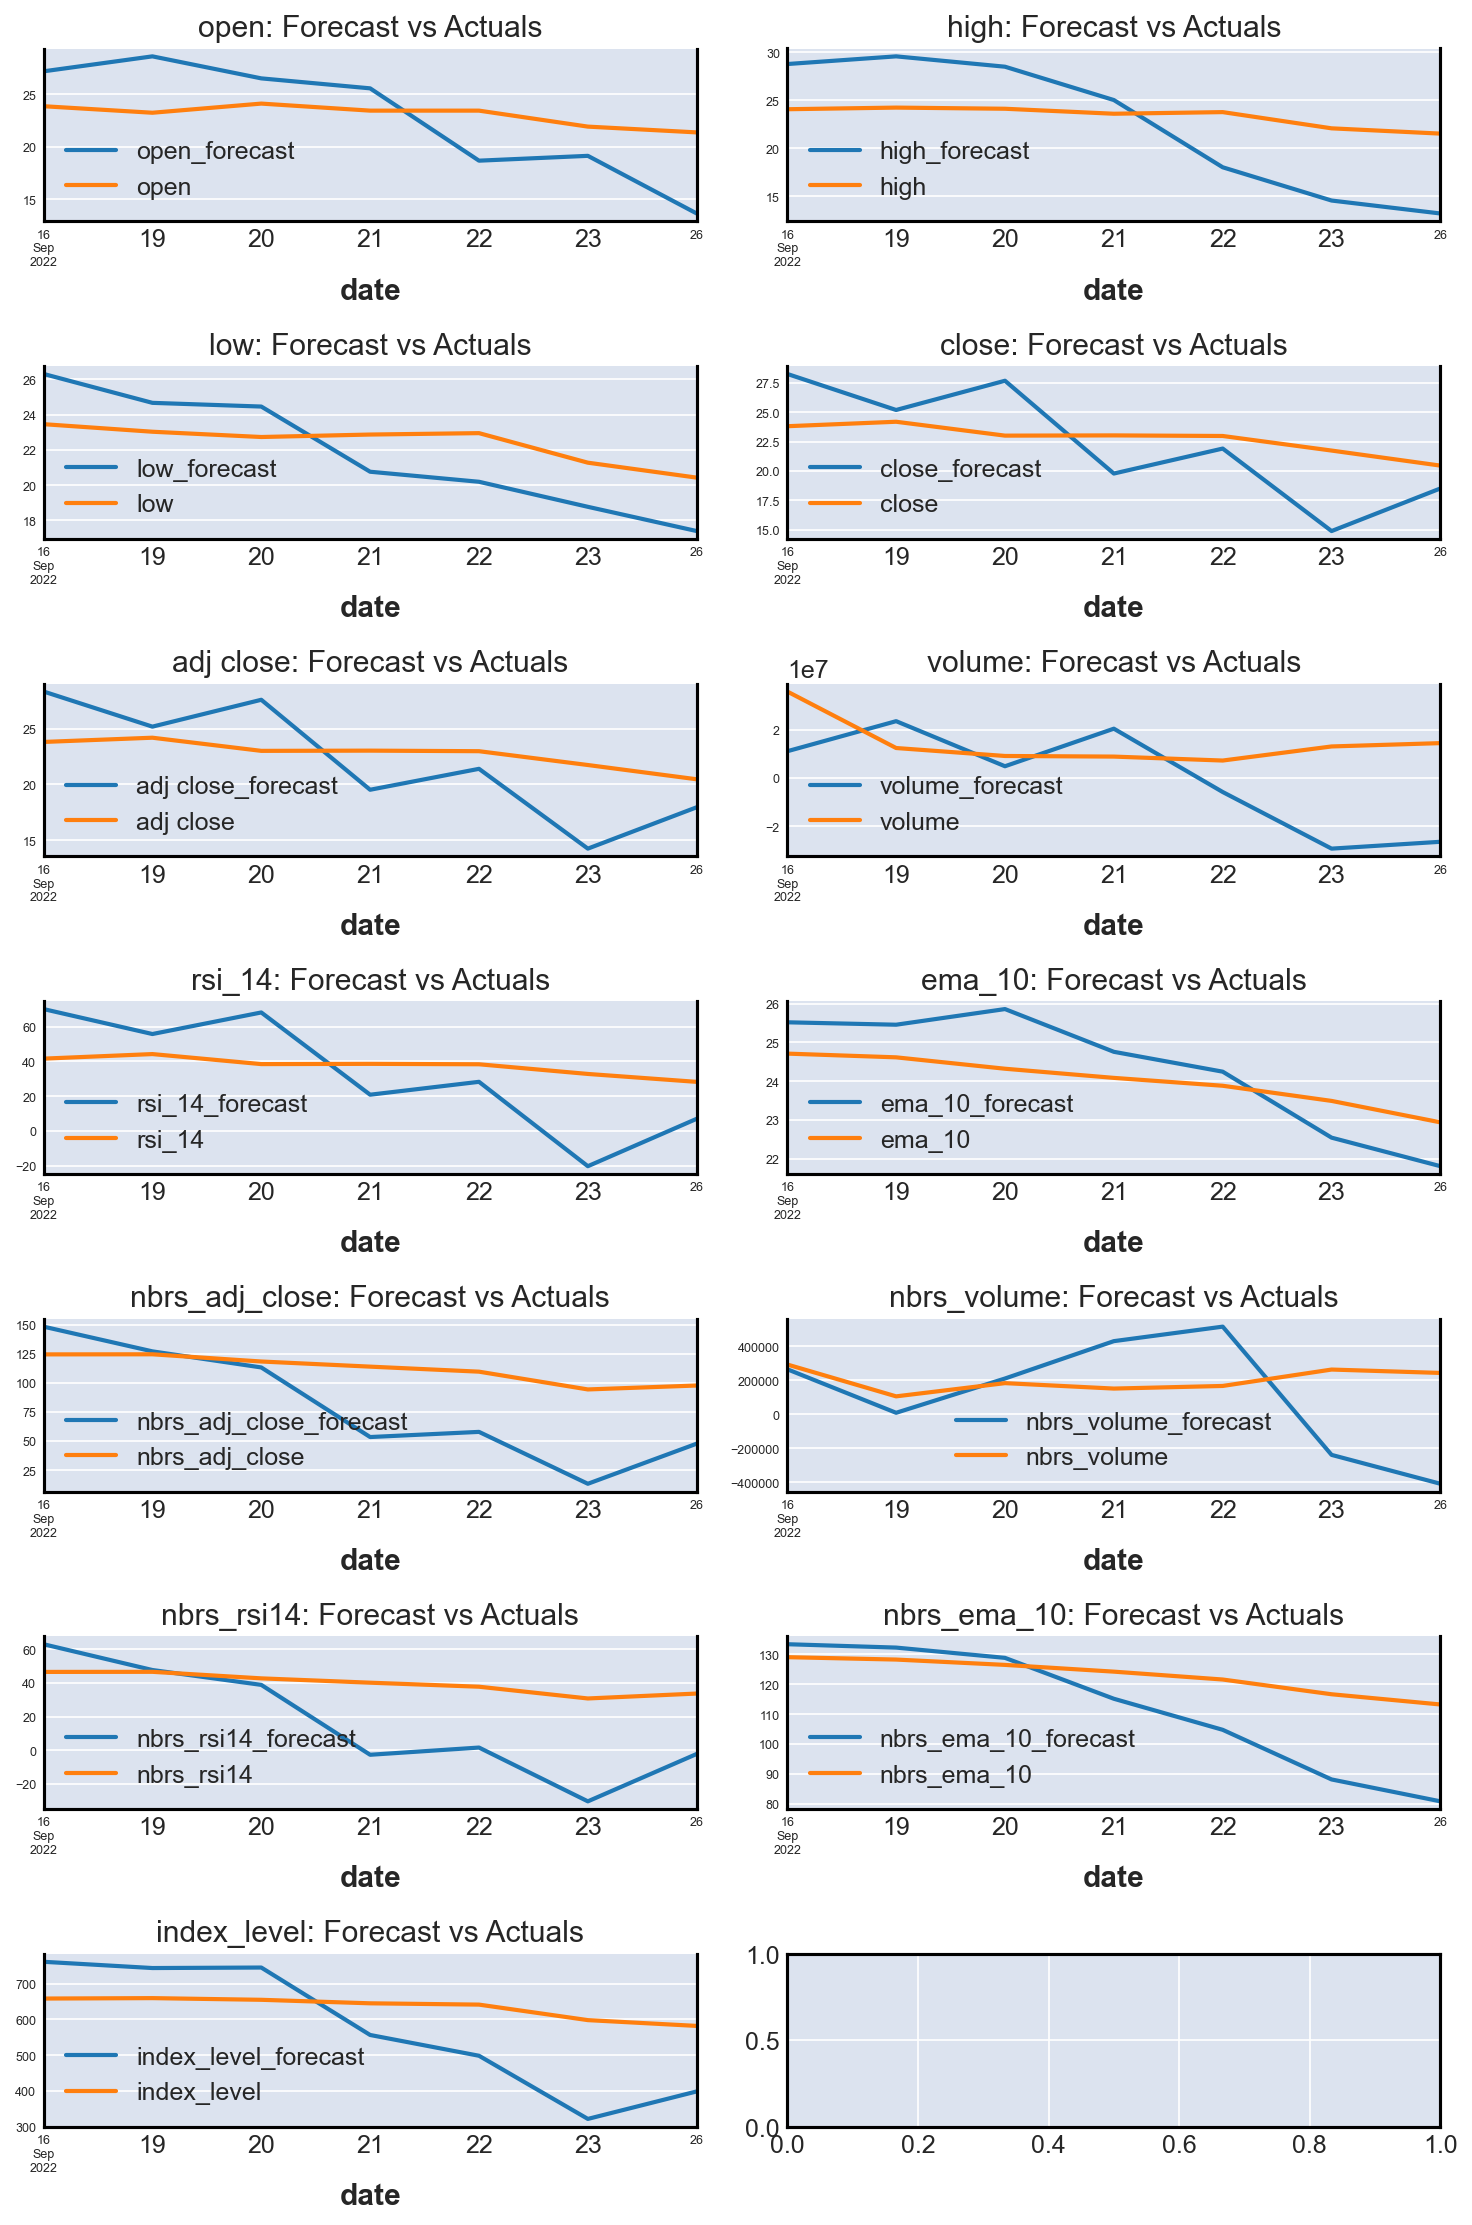

In [21]:
fig, axes = plt.subplots(nrows=int((len(stocks_and_index.columns)+1)/2), ncols=2, dpi=150, figsize=(10,15))
for i, (col,ax) in enumerate(zip(stocks_and_index.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

# wrangle.compare_forecast_to_actual(stocks_and_index,df_results)

## Evaluation of the forecasts using common loss functions, min/max, and correlation

In [22]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

def adjust(val, length= 6): return str(val).ljust(length)

print('Forecast Accuracy of: open')
accuracy_prod = forecast_accuracy(df_results['open_forecast'].values, test['open'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: high')
accuracy_prod = forecast_accuracy(df_results['high_forecast'].values, test['high'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: low')
accuracy_prod = forecast_accuracy(df_results['low_forecast'].values, test['low'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: close')
accuracy_prod = forecast_accuracy(df_results['close_forecast'].values, test['close'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: adj close')
accuracy_prod = forecast_accuracy(df_results['adj close_forecast'].values, test['adj close'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: volume')
accuracy_prod = forecast_accuracy(df_results['volume_forecast'].values, test['volume'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: rsi_14')
accuracy_prod = forecast_accuracy(df_results['rsi_14_forecast'].values, test['rsi_14'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: ema_10')
accuracy_prod = forecast_accuracy(df_results['ema_10_forecast'].values, test['ema_10'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: nbrs_adj_close')
accuracy_prod = forecast_accuracy(df_results['nbrs_adj_close_forecast'].values, test['nbrs_adj_close'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: nbrs_volume')
accuracy_prod = forecast_accuracy(df_results['nbrs_volume_forecast'].values, test['nbrs_volume'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: nbrs_rsi14')
accuracy_prod = forecast_accuracy(df_results['nbrs_rsi14_forecast'].values, test['nbrs_rsi14'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: nbrs_ema_10')
accuracy_prod = forecast_accuracy(df_results['nbrs_ema_10_forecast'].values, test['nbrs_ema_10'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

Forecast Accuracy of: open
mape   :  0.1786
me     :  -0.2931
mae    :  4.0657
mpe    :  -0.0187
rmse   :  4.4716
corr   :  0.8053
minmax :  0.1677

Forecast Accuracy of: high
mape   :  0.2324
me     :  -0.8196
mae    :  5.3491
mpe    :  -0.0444
rmse   :  5.7413
corr   :  0.8925
minmax :  0.2177

Forecast Accuracy of: low
mape   :  0.107
me     :  -0.5995
mae    :  2.3798
mpe    :  -0.0301
rmse   :  2.435
corr   :  0.8164
minmax :  0.1037

Forecast Accuracy of: close
mape   :  0.147
me     :  -0.4263
mae    :  3.317
mpe    :  -0.0237
rmse   :  3.8709
corr   :  0.719
minmax :  0.1376

Forecast Accuracy of: adj close
mape   :  0.16
me     :  -0.7146
mae    :  3.6014
mpe    :  -0.037
rmse   :  4.1389
corr   :  0.7279
minmax :  0.1507

Forecast Accuracy of: volume


/var/folders/cz/c_3mcxjd70n5lt7ww36zq9km0000gn/T/ipykernel_30640/4127514098.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
/var/folders/cz/c_3mcxjd70n5lt7ww36zq9km0000gn/T/ipykernel_30640/4127514098.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)


mape   :  1.6118
me     :  -14674596.4163
mae    :  21166262.6259
mpe    :  -0.9799
rmse   :  25452444.2417
corr   :  0.1055
minmax :  1.4446

Forecast Accuracy of: rsi_14
mape   :  0.6876
me     :  -4.6264
mae    :  24.5466
mpe    :  -0.1964
rmse   :  28.0508
corr   :  0.749
minmax :  0.5919

Forecast Accuracy of: ema_10
mape   :  0.0376
me     :  0.3064
mae    :  0.9003
mpe    :  0.0119
rmse   :  0.9629
corr   :  0.9526
minmax :  0.0366

Forecast Accuracy of: nbrs_adj_close
mape   :  0.376
me     :  -31.7867
mae    :  39.3342
mpe    :  -0.3155
rmse   :  47.9236
corr   :  0.9174
minmax :  0.3716

Forecast Accuracy of: nbrs_volume
mape   :  1.3926
me     :  -89067.0608
mae    :  276247.5938
mpe    :  -0.2164
rmse   :  356101.1
corr   :  -0.3716
minmax :  1.0128

Forecast Accuracy of: nbrs_rsi14
mape   :  0.7929
me     :  -23.1906
mae    :  28.1992
mpe    :  -0.6852
rmse   :  34.7493
corr   :  0.9368
minmax :  0.7797

Forecast Accuracy of: nbrs_ema_10
mape   :  0.1182
me     :  -10.9019